In [7]:
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image


In [90]:
#Stating theme
import jupyterthemes as jt
!jt -t solarizedd -T -N -kl -nfs 11 -fs 11 -ofs 11 -cursc r -cellw 90%
jt.jtplot.style()
jt.get_themes()

['chesterish',
 'grade3',
 'gruvboxd',
 'gruvboxl',
 'monokai',
 'oceans16',
 'onedork',
 'solarizedd',
 'solarizedl']

In [6]:
ls TheRealDay2lab04ForRealThisIsTheOneWeWant\KKkalibration_horizontal

 Volume in drive C has no label.
 Volume Serial Number is F64F-FF16

 Directory of C:\Users\jarde\Documents\GitHub\AdvancedLab-PHSX444\lab04\TheRealDay2lab04ForRealThisIsTheOneWeWant\KKkalibration_horizontal

11/24/2021  11:16 AM    <DIR>          .
11/24/2021  11:16 AM    <DIR>          ..
11/12/2021  09:40 AM           756,674 image_00000.png
11/12/2021  09:40 AM           756,718 image_00001.png
11/12/2021  09:40 AM           756,542 image_00002.png
11/12/2021  09:40 AM           756,703 image_00003.png
11/12/2021  09:40 AM           756,613 image_00004.png
11/12/2021  09:40 AM           756,731 image_00005.png
11/12/2021  09:40 AM           756,638 image_00006.png
11/12/2021  09:40 AM           756,766 image_00007.png
11/12/2021  09:40 AM           756,636 image_00008.png
11/12/2021  09:40 AM           756,435 image_00009.png
11/12/2021  09:40 AM           107,449 Screenshot from 2021-11-12 09-40-12.png
              11 File(s)      7,673,905 bytes
               2 Dir(s)  147,623,

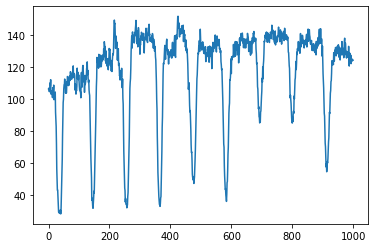

<ipython-input-46-06f629324051>:16: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/freq, np.abs(data))


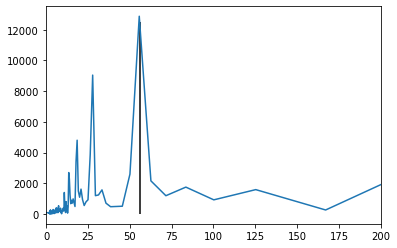

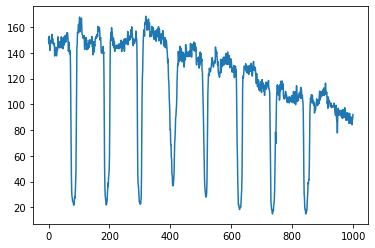

<ipython-input-46-06f629324051>:37: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/freq, np.abs(data))


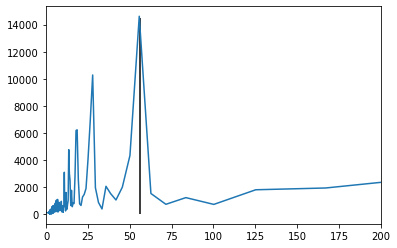

In [46]:
path = 'TheRealDay2lab04ForRealThisIsTheOneWeWant/KKkalibration_horizontal/'
names = ['image_00000.png', 'image_00001.png', 'image_00002.png', 'image_00003.png', 'image_00004.png', 
         'image_00005.png', 'image_00006.png', 'image_00007.png', 'image_00008.png', 'image_00009.png']
im = Image.open(path + names[0])
running_im = np.zeros([np.array(im).shape[0]])
for i in names:
    im = Image.open(path + i)
    running_im += np.array(im)[:, 500]
running_im = running_im/len(names)
plt.plot(running_im)
plt.show()

t = np.arange(501)
freq = np.fft.fftfreq(t.shape[-1])
data = np.fft.rfft(running_im)
plt.plot(1/freq, np.abs(data))
plt.xlim(0,200)
plt.vlines(56, 0, 12500, color='black')
plt.show()

# h calibration: 56

path = 'TheRealDay2lab04ForRealThisIsTheOneWeWant/KKkalibration_vertical/'
names = ['image_00000.png', 'image_00001.png', 'image_00002.png', 'image_00003.png', 'image_00004.png', 
         'image_00005.png', 'image_00006.png', 'image_00007.png', 'image_00008.png', 'image_00009.png']
im = Image.open(path + names[0])
running_im = np.zeros([np.array(im).shape[0]])
for i in names:
    im = Image.open(path + i)
    running_im += np.array(im)[500, :]
running_im = running_im/len(names)
plt.plot(running_im)
plt.show()

t = np.arange(501)
freq = np.fft.fftfreq(t.shape[-1])
data = np.fft.rfft(running_im)
plt.plot(1/freq, np.abs(data))
plt.xlim(0,200)
plt.vlines(56, 0, 14500, color='black')
plt.show()

# v calibration: 56


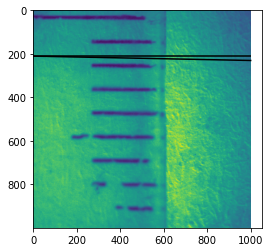

In [57]:
path = 'TheRealDay2lab04ForRealThisIsTheOneWeWant/KKkalibration_horizontal/'

im = Image.open(path + names[0])
plt.imshow(im)
plt.hlines(210, 0, 1000, color='black')
x = np.linspace(0,2000,1000)
m=0.01
plt.plot(m*x + 210, color='black')
plt.show()

#small enough angle to call it small angle approx

In [64]:

yscale = (56)
xscale = (56)
xpix = u.def_unit('xpix', 10*u.um/xscale)
ypix = u.def_unit('ypix', 10*u.um/yscale)

## key for runs:
<ul>
    <li>31: 30Hz</li>
    <li>32: 120Hz</li>
    <li>33: 60Hz</li>
    <li>34: 60.5Hz</li>
    <li>35: 59.5Hz</li>
    <li>36: 200Hz</li>
</ul>

In [67]:
ls processed_data

 Volume in drive C has no label.
 Volume Serial Number is F64F-FF16

 Directory of C:\Users\jarde\Documents\GitHub\AdvancedLab-PHSX444\lab04\processed_data

11/24/2021  12:24 PM    <DIR>          .
11/24/2021  12:24 PM    <DIR>          ..
11/24/2021  11:57 AM            77,053 data_31.csv
11/24/2021  12:00 PM            77,277 data_32.csv
11/24/2021  12:04 PM            77,335 data_33.csv
11/24/2021  12:13 PM            76,802 data_34.csv
11/24/2021  12:15 PM            76,977 data_35.csv
11/24/2021  12:27 PM            77,059 data_36.csv
11/24/2021  12:26 PM           117,216 data_trans.csv
               7 File(s)        579,719 bytes
               2 Dir(s)  147,794,010,112 bytes free


In [228]:
data = pd.read_csv("processed_data/data_36.csv")
data.rename(columns={'# x': 'x'}, inplace=True)

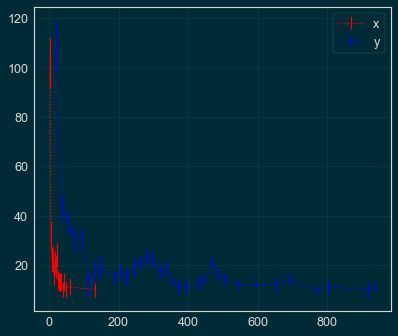

In [190]:
hisx = np.histogram((data["x"]-np.mean(data["x"]))**2, bins=1000)
df = pd.DataFrame({'bin_right': hisx[1][1:], 'count':hisx[0], 'err':np.sqrt(hisx[0])})
df = df[df['count'] >= 10]
plt.errorbar(df['bin_right'], df['count'], yerr = df['err'], linestyle=":", marker="x", color="red", label = 'x')

hisy = np.histogram((data["y"]-np.mean(data["y"]))**2, bins=1000)
df = pd.DataFrame({'bin_right': hisy[1][1:], 'count':hisy[0], 'err':np.sqrt(hisx[0])})
df = df[df['count'] >= 10]
plt.errorbar(df['bin_right'], df['count'], yerr = df['err'], linestyle=":", marker="x", color="blue", label='y')
plt.legend()
plt.show()

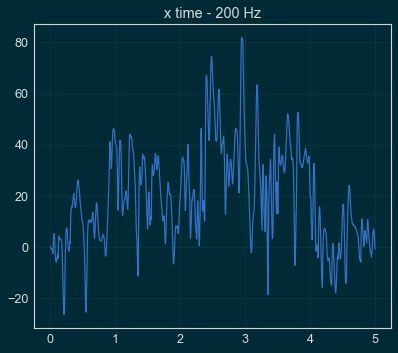

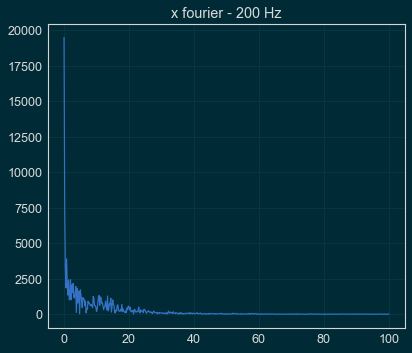

In [229]:
t = np.linspace(0,len(data['x'])*1/200, len(data['x']))
plt.plot(t, data['x'])
plt.title('x time - 200 Hz')
plt.show()

datax = data['x']
datax_four = np.fft.rfft(datax)
freq = np.fft.rfftfreq(len(datax), 1/200)
dffreq = pd.DataFrame({'freq':freq, 'data': datax_four})
plt.plot(dffreq['freq'], np.abs(dffreq['data']))
plt.title('x fourier - 200 Hz')
plt.show()

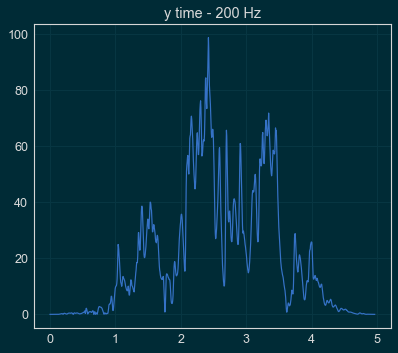

No handles with labels found to put in legend.


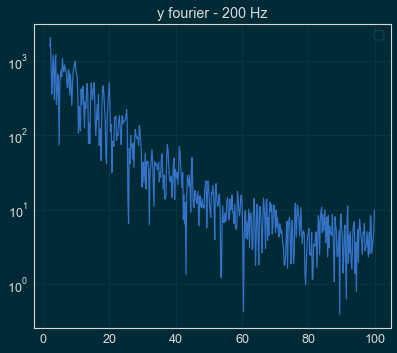

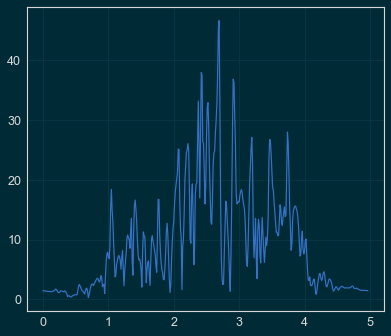

In [255]:
# datay = data['y']
datay = data['y'][data['y'] < 50]* np.hanning(datay.size)
t = np.linspace(0,len(datay)*1/200, len(datay))
plt.plot(t, np.abs(datay))
plt.title('y time - 200 Hz (with 60 hz)')
plt.show()

# datay = datay * np.hanning(datay.size)
datay_four = np.fft.rfft(datay)
freq = np.fft.rfftfreq(len(datay), 1/200)
dffreq = pd.DataFrame({'freq':freq, 'data': datay_four})
dffreq = dffreq[dffreq['freq']>2]
plt.plot(dffreq['freq'], np.abs(dffreq['data']))
plt.title('y fourier - 200 Hz')
plt.yscale('log')
# plt.vlines(60, 1e2, 1e3, color="r", label="60Hz")
plt.legend()
plt.show()

dffreq = dffreq[(dffreq['freq']>65) | (dffreq['freq']<55)]
t = np.linspace(0, len(datay)*1/200, (np.fft.ifft(dffreq['data']).real).size)
plt.plot(t, np.abs(np.fft.ifft(dffreq['data'])))

In [250]:
np.linspace(0, len(datay)*1/200, (np.fft.ifft(dffreq['data']).real).size)

array([0.        , 0.01136156, 0.02272311, 0.03408467, 0.04544622,
       0.05680778, 0.06816934, 0.07953089, 0.09089245, 0.102254  ,
       0.11361556, 0.12497712, 0.13633867, 0.14770023, 0.15906178,
       0.17042334, 0.1817849 , 0.19314645, 0.20450801, 0.21586957,
       0.22723112, 0.23859268, 0.24995423, 0.26131579, 0.27267735,
       0.2840389 , 0.29540046, 0.30676201, 0.31812357, 0.32948513,
       0.34084668, 0.35220824, 0.36356979, 0.37493135, 0.38629291,
       0.39765446, 0.40901602, 0.42037757, 0.43173913, 0.44310069,
       0.45446224, 0.4658238 , 0.47718535, 0.48854691, 0.49990847,
       0.51127002, 0.52263158, 0.53399314, 0.54535469, 0.55671625,
       0.5680778 , 0.57943936, 0.59080092, 0.60216247, 0.61352403,
       0.62488558, 0.63624714, 0.6476087 , 0.65897025, 0.67033181,
       0.68169336, 0.69305492, 0.70441648, 0.71577803, 0.72713959,
       0.73850114, 0.7498627 , 0.76122426, 0.77258581, 0.78394737,
       0.79530892, 0.80667048, 0.81803204, 0.82939359, 0.84075